In [74]:
import numpy as np

In [76]:
import matplotlib.pyplot as plt

In [86]:
import pandas as pd 

In [88]:
from scipy import stats

In [90]:
import seaborn as sns

In [94]:
df = pd.read_csv('data/sierraleone-bumbuna.csv')

In [96]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [98]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [45]:
df.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

#the upper command tell me used for the cleaning so was checking if there is missing value is I observe the comment columns has alot missing value 

In [100]:
df.drop('Comments',axis=1,inplace=True)

so I drop the comment column because doesn't it has alot of nan value additional i don't need for the eda

In [102]:
df.isnull().sum()

Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
dtype: int64

In [104]:
df.duplicated().sum()

0

The second one is that we don't have duplicate values so cool we procede to the next step

In [106]:
df['Timestamp'] = pd.to_datetime((df['Timestamp']))

convert timestamp columns is object so we have to convert it to datetime

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [110]:
cols_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_score = np.abs(stats.zscore(df[cols_check]))
df_clean = df[(z_score < 3).all(axis=1)]

In [112]:
df = df_clean.copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 509308 entries, 0 to 525599
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      509308 non-null  datetime64[ns]
 1   GHI            509308 non-null  float64       
 2   DNI            509308 non-null  float64       
 3   DHI            509308 non-null  float64       
 4   ModA           509308 non-null  float64       
 5   ModB           509308 non-null  float64       
 6   Tamb           509308 non-null  float64       
 7   RH             509308 non-null  float64       
 8   WS             509308 non-null  float64       
 9   WSgust         509308 non-null  float64       
 10  WSstdev        509308 non-null  float64       
 11  WD             509308 non-null  float64       
 12  WDstdev        509308 non-null  float64       
 13  BP             509308 non-null  int64         
 14  Cleaning       509308 non-null  int64         
 15  Preci

In [114]:
df.to_csv('data/togo_clean.csv')

In [116]:
df.set_index('Timestamp', inplace=True)

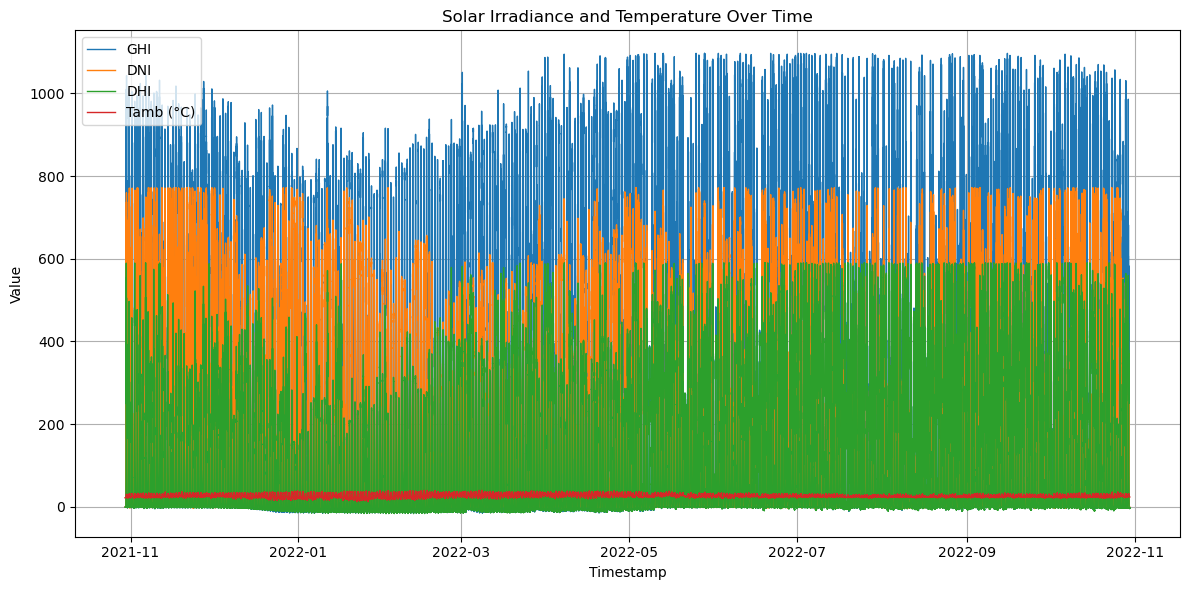

In [118]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['GHI'], label='GHI', linewidth=1)
plt.plot(df.index, df['DNI'], label='DNI', linewidth=1)
plt.plot(df.index, df['DHI'], label='DHI', linewidth=1)
plt.plot(df.index, df['Tamb'], label='Tamb (°C)', linewidth=1)

plt.title('Solar Irradiance and Temperature Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

observation by month 

/var/folders/0d/6s2f0h9j6bs040pkv68kv4p40000gp/T/ipykernel_20745/3867349173.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


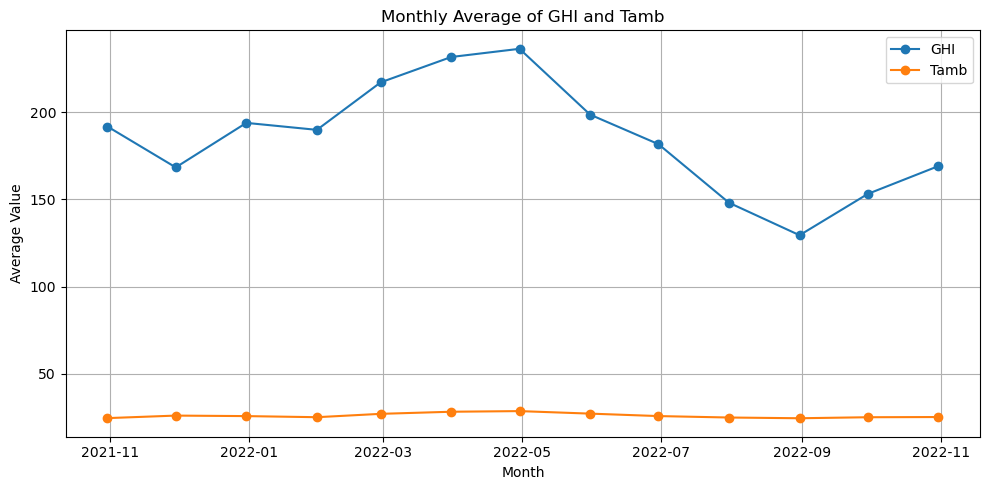

In [122]:
df_monthly = df.resample('M').mean()

plt.figure(figsize=(10, 5))
plt.plot(df_monthly.index, df_monthly['GHI'], marker='o', label='GHI')
plt.plot(df_monthly.index, df_monthly['Tamb'], marker='o', label='Tamb')

plt.title('Monthly Average of GHI and Tamb')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


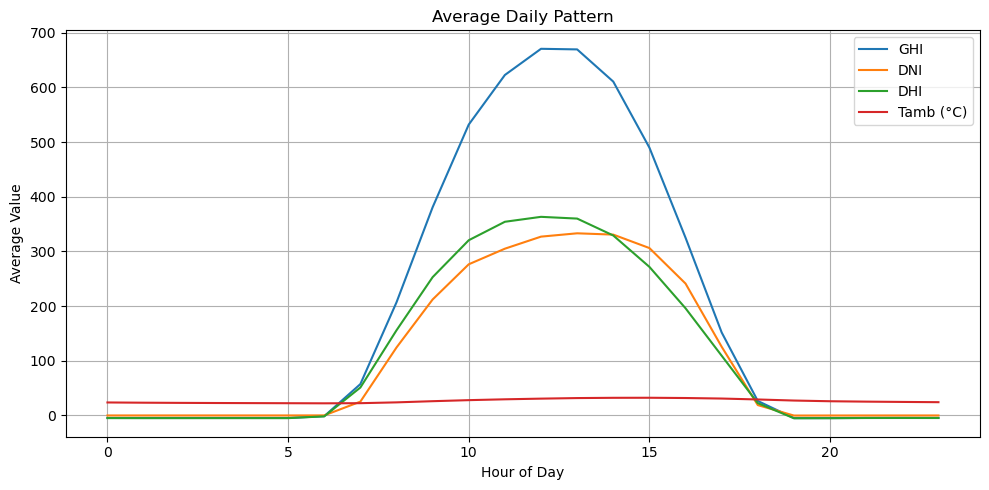

In [124]:
df['Hour'] = df.index.hour
df_hourly = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb (°C)')
plt.title('Average Daily Pattern')
plt.xlabel('Hour of Day')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

In [128]:
corr_matrix = df[columns].corr()

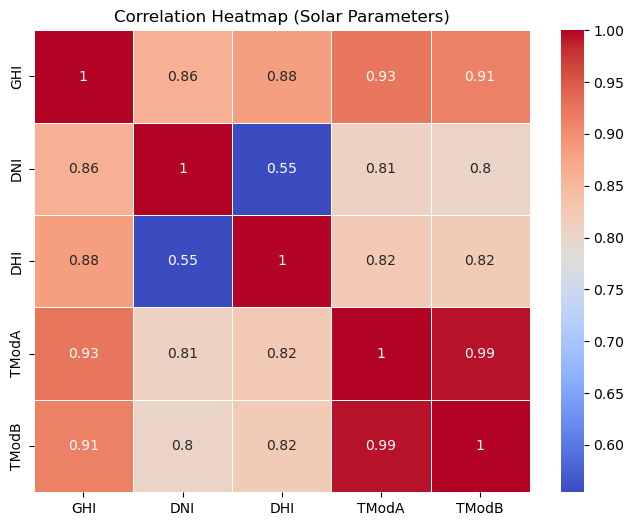

In [130]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Solar Parameters)')
plt.show()

from the heat we will realize the relation between the columns each other's GHI and DNI are highly correlated, meaning they are directly proportional. TModB and TModA are so related b

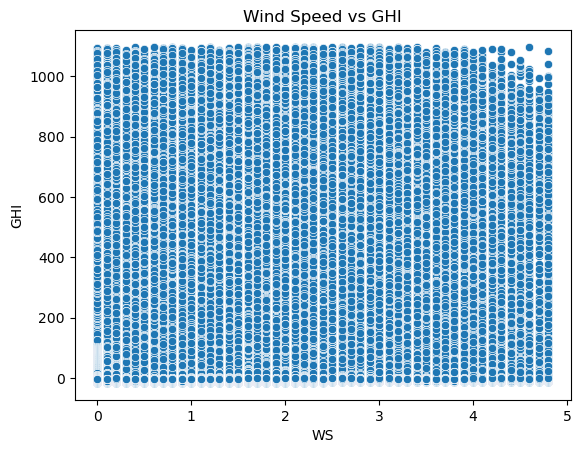

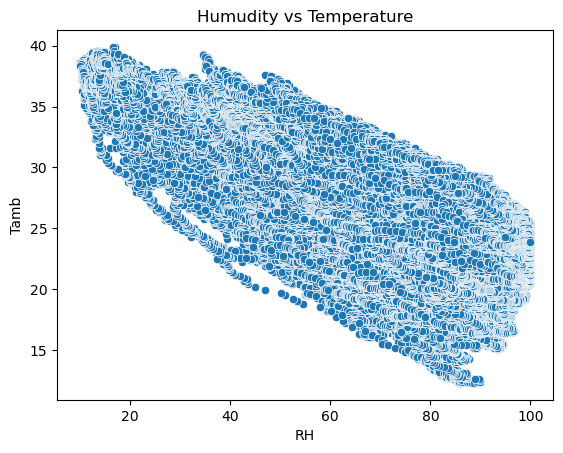

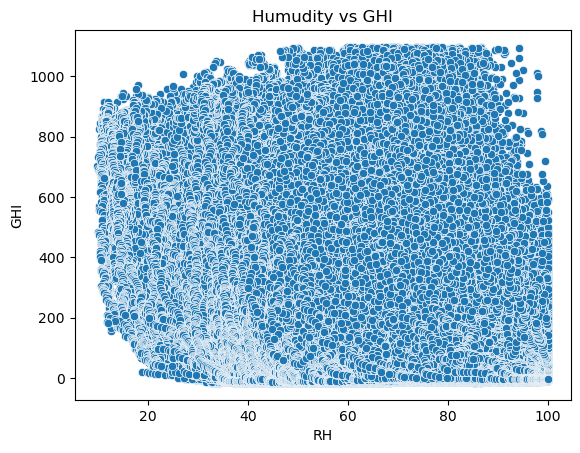

In [132]:
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed vs GHI')
plt.show()
 
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Humudity vs Temperature')
plt.show()

sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Humudity vs GHI')
plt.show()


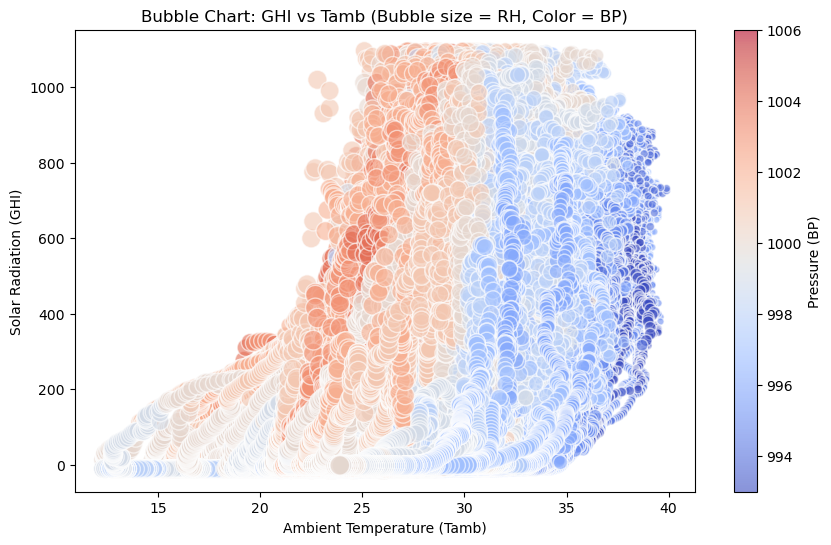

In [134]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], 
            s=df['RH']*2,  # Bubble size scaled by RH
            c=df['BP'],    # Bubble color by BP
            cmap='coolwarm', alpha=0.6, edgecolors='w')

plt.title('Bubble Chart: GHI vs Tamb (Bubble size = RH, Color = BP)')
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('Solar Radiation (GHI)')
plt.colorbar(label='Pressure (BP)')
plt.show()
